# Spatiotemporal Gaussian Process (GP) Modeling
This notebook demonstrates how to use Gaussian Processes (GPs) to model and predict spatiotemporal data using scikit-learn.

**Contents:**
- Generation of synthetic spatiotemporal data
- Fitting a GP model with spatial and temporal kernels
- Visualization of GP predictions over a grid
- Example use cases: environmental monitoring, sensor networks, spatial statistics

# Spatiotemporal Gaussian Process Example
We use scikit-learn's Gaussian Process to model spatially correlated time series.

Learned kernel: 0.913**2 * RBF(length_scale=[0.301, 1.09])


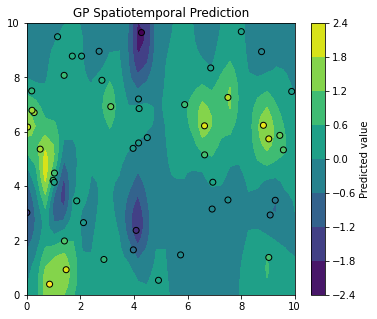

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate toy spatiotemporal data
np.random.seed(1)
X = np.random.rand(50,2) * 10  # time, space
y = np.sin(X[:,0]) + np.cos(X[:,1]) + 0.2*np.random.randn(50)

# Define kernel
kernel = C(1.0) * RBF([1.0, 1.0])
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)

gp.fit(X, y)
print("Learned kernel:", gp.kernel_)

# Predict on grid
t = np.linspace(0,10,30)
s = np.linspace(0,10,30)
T, S = np.meshgrid(t,s)
Xpred = np.vstack([T.ravel(), S.ravel()]).T
ypred, ystd = gp.predict(Xpred, return_std=True)

plt.figure(figsize=(6,5))
plt.contourf(T,S,ypred.reshape(30,30), cmap='viridis')
plt.colorbar(label='Predicted value')
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',cmap='viridis')
plt.title("GP Spatiotemporal Prediction")
plt.show()

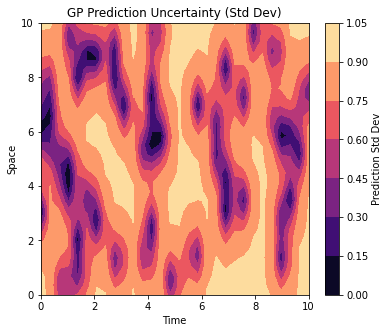

In [2]:
# Visualize GP prediction uncertainty (standard deviation)
plt.figure(figsize=(6,5))
plt.contourf(T, S, ystd.reshape(30,30), cmap='magma')
plt.colorbar(label='Prediction Std Dev')
plt.title('GP Prediction Uncertainty (Std Dev)')
plt.xlabel('Time')
plt.ylabel('Space')
plt.show()